<a href="https://colab.research.google.com/github/CECILIACFR/DATASCIENCE/blob/main/MVP_CD_Skiing_Hotels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise e Boas Práticas

## Profs. Tatiana Escovedo e Hugo Villamizar

### Aluna: Cecilia Correa Ferrari Rey

### MVP Hotéis de Esqui na Europa


## 1. Definição do Problema













O dataset usado neste projeto será o **Skiing Hotels**, proveniente da plataforma Kaggle, sobre Hotéis em resorts de Esqui em toda a Europa, contendo detalhes sobre os resorts onde estão localizados, como preço (em libras esterlinas) por pessoa por semana, número de elevadores no resort, distância total da pista e neve registrada em 2020 em cada resort.  Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/jacklacey/skiing-hotels.

Este Notebook de Análise Eploratória de um arquivo CSV, serve para checar a exsitência de valores faltantes, entender a distribuição de dados, verificar as relações entre os dados.  Através de visualizações tiraremos conclusões sobre quais são os dados mais relevantes e quais talvez precisemos manter fora de nossos modelos. Também investigamos um modelo de linha de base muito simples.

**Informações sobre os atributos:**

1. **index**: Uma coluna de índice.
2. **country**: O país onde o hotel está localizado.
3. **resort**: O resort onde o hotel está loca.lizado.
4. **hotel**: O nome do hotel.
5. **price**: O preço (em libras esterlinas) por pessoa por semana. 
6. **distance_lift**: A distância do hotel ao teleférico mais próximo, em metros.
7. **altitude**:  A altitude do hotel, em metros.
8. **totalLifts**: O total de elevadores (teleféricos) no resort.
9.  **gondolas**: O total de gôndolas no resort.
10. **chairlifts**: O total de cadeiras no resort.
11. **draglifts**: O total de draglift no resort.
12. **blues**: O total de pistas azuis - dificuldade baixa.
13. **reds**: O total de pistas vermelhas - dificuldade média.
14. **blacks**: O total de pistas pretas - dificuldade alta.
15. **totalRuns**: A distância total da pista em Km.
16. **link**: O link do Hotél de Esqui.
17. **sleeps**: O número de pessoas que podem dormir no Hotel de Esqui.
18. **decSnowLow2020**: A quantidade de neve nas encontas mais baixas em dezembro de 2020 em cm.
19. **decSnowHigh2020**: A quantidade de neve nas encontas mais altas em dezembro de 2020 em cm.
20. **janSnowLow2020**: A quantidade de neve nas encontas mais baixas em janeiro de 2020 em cm.
21. **janSnowHigh2020**: A quantidade de neve nas encontas mais altas em janeiro de 2020 em cm.
22. **febSnowLow2020**: A quantidade de neve nas encontas mais baixas em fevereiro de 2020 em cm.
23. **febSnowHigh2020**: A quantidade de neve nas encontas mais altas em fevereiro de 2020 em cm.

















In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import gc
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2.   Carga de Dados

Será carregado arquivo CSV usando Pandas usando uma URL de meu repositório do GitHUb sem cabeçalho disponível online.
  
Com o dataset caregado, irei explrá-lo um pouco.


In [3]:
# Carrega arquivo csv usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/CECILIACFR/DATASCIENCE/main/ski_hotels.csv"

# Informa o cabeçalho das colunas
colunas = ['index','country', 'resort', 'hotel', 'price', 'distance_lift', 'altitude', 'totalPiste', 'totalLifts', 'gondolas', 'chairlifts', 'draglifts', 'blues', 'reds', 'blacks', 'totalRuns', 'link', 'sleeps', 'decSnowLow2020', 'decSnowHigh2020', 'janSnowLow2020', 'janSnowHigh2020', 'febSnowLow2020', 'febSnowHigh2020']

# Lê o arquivo utilizando as colunas informadas]
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

# Verificando que dataset é um dataframe
type(dataset)   


pandas.core.frame.DataFrame

In [4]:
# Verficando as primeiras linhas do dataset
dataset.head()


,index,country,resort,hotel,price,distance_lift,altitude,totalPiste,totalLifts,gondolas,...,blacks,totalRuns,link,sleeps,decSnowLow2020,decSnowHigh2020,janSnowLow2020,janSnowHigh2020,febSnowLow2020,febSnowHigh2020
0,0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
1,1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
2,2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,140,0,70,5,75,5,77
3,3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,...,1.0,15.0,https://www.igluski.com/ski-resorts/bulgaria/b...,590,0,0,160,200,194,246
4,4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,386,0,70,5,75,5,77


Ao analisar as primeiras linhas do dataset, é possível perceber que existem valores faltantes ("**unknown**"), como nas colunas "**distance_lift**" e "**sleeps**", e ainda verifica-se que os dados da primeira coluna denominada **index**, tem conteúdo que não será necessário.

In [5]:
# Exclue a primeira coluna do dataset
dataset = dataset.drop(columns=['index'])

In [6]:
# Verficando novamente as primeiras linhas do dataset
dataset.head()

,country,resort,hotel,price,distance_lift,altitude,totalPiste,totalLifts,gondolas,chairlifts,...,blacks,totalRuns,link,sleeps,decSnowLow2020,decSnowHigh2020,janSnowLow2020,janSnowHigh2020,febSnowLow2020,febSnowHigh2020
0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,9,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,9,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,7,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,140,0,70,5,75,5,77
3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,4,...,1.0,15.0,https://www.igluski.com/ski-resorts/bulgaria/b...,590,0,0,160,200,194,246
4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,7,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,386,0,70,5,75,5,77


## 3. Análise de Dados





### 3.1 Estatístcias Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas

In [7]:
# Mostra as dimensões do dataset
print(dataset.shape)

(407, 23)


O dataset possui e 407 instâncias (linhas) e 23 atributos (colunas).



In [8]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          407 non-null    object 
 1   resort           407 non-null    object 
 2   hotel            407 non-null    object 
 3   price            407 non-null    int64  
 4   distance_lift    407 non-null    object 
 5   altitude         407 non-null    int64  
 6   totalPiste       407 non-null    int64  
 7   totalLifts       407 non-null    int64  
 8   gondolas         407 non-null    int64  
 9   chairlifts       407 non-null    int64  
 10  draglifts        407 non-null    int64  
 11  blues            407 non-null    float64
 12  reds             407 non-null    float64
 13  blacks           407 non-null    float64
 14  totalRuns        407 non-null    float64
 15  link             407 non-null    object 
 16  sleeps           407 non-null    object 
 17  decSnowLow2020  

In [9]:
# Exibindo os nomes das colunas
dataset.columns

Index(['country', 'resort', 'hotel', 'price', 'distance_lift', 'altitude',
       'totalPiste', 'totalLifts', 'gondolas', 'chairlifts', 'draglifts',
       'blues', 'reds', 'blacks', 'totalRuns', 'link', 'sleeps',
       'decSnowLow2020', 'decSnowHigh2020', 'janSnowLow2020',
       'janSnowHigh2020', 'febSnowLow2020', 'febSnowHigh2020'],
      dtype='object')

In [10]:
# Exibindo a quantidade de linhas por coluna
dataset.count()

country            407
resort             407
hotel              407
price              407
distance_lift      407
altitude           407
totalPiste         407
totalLifts         407
gondolas           407
chairlifts         407
draglifts          407
blues              407
reds               407
blacks             407
totalRuns          407
link               407
sleeps             407
decSnowLow2020     407
decSnowHigh2020    407
janSnowLow2020     407
janSnowHigh2020    407
febSnowLow2020     407
febSnowHigh2020    407
dtype: int64

In [11]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

country             object
resort              object
hotel               object
price                int64
distance_lift       object
altitude             int64
totalPiste           int64
totalLifts           int64
gondolas             int64
chairlifts           int64
draglifts            int64
blues              float64
reds               float64
blacks             float64
totalRuns          float64
link                object
sleeps              object
decSnowLow2020      object
decSnowHigh2020     object
janSnowLow2020      object
janSnowHigh2020     object
febSnowLow2020      object
febSnowHigh2020     object
dtype: object

In [12]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)
     

,country,resort,hotel,price,distance_lift,altitude,totalPiste,totalLifts,gondolas,chairlifts,...,blacks,totalRuns,link,sleeps,decSnowLow2020,decSnowHigh2020,janSnowLow2020,janSnowHigh2020,febSnowLow2020,febSnowHigh2020
0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,9,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,9,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,7,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,140,0,70,5,75,5,77
3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,4,...,1.0,15.0,https://www.igluski.com/ski-resorts/bulgaria/b...,590,0,0,160,200,194,246
4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,7,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,386,0,70,5,75,5,77
5,andorra,arinsal,hotel-xalet-besoli,597,500,1550,63,30,2,11,...,4.0,42.0,https://www.igluski.com/ski-resorts/andorra/ar...,66,30,60,130,180,120,170
6,austria,mayrhofen,hotel-obermair,601,600,630,600,52,8,27,...,15.0,133.0,https://www.igluski.com/ski-resorts/austria/ma...,60,0,60,5,80,2,99
7,bulgaria,borovets,hotel-lion-borovets,603,1200,1390,58,18,1,4,...,1.0,15.0,https://www.igluski.com/ski-resorts/bulgaria/b...,314,0,0,160,200,194,246
8,andorra,arinsal,hotel-xalet-verdu,606,300,1550,63,30,2,11,...,4.0,42.0,https://www.igluski.com/ski-resorts/andorra/ar...,104,30,60,130,180,120,170
9,andorra,arinsal,hotel-patagonia,632,100,1550,63,30,2,11,...,4.0,42.0,https://www.igluski.com/ski-resorts/andorra/ar...,160,30,60,130,180,120,170


In [13]:
dataset.head().style.background_gradient(cmap = "Purples")

,country,resort,hotel,price,distance_lift,altitude,totalPiste,totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns,link,sleeps,decSnowLow2020,decSnowHigh2020,janSnowLow2020,janSnowHigh2020,febSnowLow2020,febSnowHigh2020
0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,9,14,17.000000,24.000000,1.000000,42.000000,https://www.igluski.com/ski-resorts/italy/bardonecchia/residence-tabor_38648?holidayId=58413613,unknown,70,170,60,200,47,177
1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,9,14,17.000000,24.000000,1.000000,42.000000,https://www.igluski.com/ski-resorts/italy/bardonecchia/residence-villa-frejus_38647?holidayId=58464837,unknown,70,170,60,200,47,177
2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,7,16,5.000000,8.000000,1.000000,14.000000,https://www.igluski.com/ski-resorts/bulgaria/bansko/hotel-mura_20914?holidayId=58542822,140,0,70,5,75,5,77
3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,4,13,1.000000,13.000000,1.000000,15.000000,https://www.igluski.com/ski-resorts/bulgaria/borovets/hotel-samokov_1092?holidayId=58456610,590,0,0,160,200,194,246
4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,7,16,5.000000,8.000000,1.000000,14.000000,https://www.igluski.com/ski-resorts/bulgaria/bansko/hotel-lion---bansko_20625?holidayId=58322886,386,0,70,5,75,5,77


As primeiras linhas do dataset exibidas acima demonstram as seguintes **informações quantitativas** mais relevantes, a saber:

*   o **preço** (coluna "price"**negrito**) dos hotéis são de valores bem próximos;
*   a **altitude** de três hotéis é em torno de 1.300m;
*   o **total de teleféricos** (coluna "**totalLifts**") é quase a mesma nos cinco hotéis exibidos;
*   o **total do gôndolas** (coluna "**gondolas**") é pequeno para cada hotel, sendo que dois hotéis não possuem e três só possuem uma única gôndola;
*   o **total de pistas blacks** (coluna "**blacks**") é 1 para cada hotél.  

In [14]:
## Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()


,price,altitude,totalPiste,totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,1095.027027,1358.781327,220.270270,60.395577,9.108108,24.766585,25.189189,41.115479,45.685504,14.007371,100.808354
std,342.841268,508.322847,164.592139,39.025295,8.398517,16.968010,19.300095,40.742178,38.777112,12.131969,81.835216
min,550.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,839.000000,900.000000,110.000000,30.000000,3.000000,12.000000,12.000000,16.000000,18.000000,4.000000,40.000000
50%,1021.000000,1441.000000,185.000000,55.000000,8.000000,22.000000,21.000000,30.000000,37.000000,9.000000,74.000000
75%,1270.500000,1800.000000,282.000000,82.000000,11.000000,35.000000,32.000000,46.000000,60.000000,22.000000,133.000000
max,2517.000000,2300.000000,1220.000000,206.000000,43.000000,83.000000,114.000000,186.000000,219.000000,51.000000,328.000000


In [15]:
dataset.describe().T.style.background_gradient(cmap = "Purples")

,count,mean,std,min,25%,50%,75%,max
price,407.000000,1095.027027,342.841268,550.000000,839.000000,1021.000000,1270.500000,2517.000000
altitude,407.000000,1358.781327,508.322847,180.000000,900.000000,1441.000000,1800.000000,2300.000000
totalPiste,407.000000,220.270270,164.592139,0.000000,110.000000,185.000000,282.000000,1220.000000
totalLifts,407.000000,60.395577,39.025295,0.000000,30.000000,55.000000,82.000000,206.000000
gondolas,407.000000,9.108108,8.398517,0.000000,3.000000,8.000000,11.000000,43.000000
chairlifts,407.000000,24.766585,16.968010,0.000000,12.000000,22.000000,35.000000,83.000000
draglifts,407.000000,25.189189,19.300095,0.000000,12.000000,21.000000,32.000000,114.000000
blues,407.000000,41.115479,40.742178,0.000000,16.000000,30.000000,46.000000,186.000000
reds,407.000000,45.685504,38.777112,0.000000,18.000000,37.000000,60.000000,219.000000
blacks,407.000000,14.007371,12.131969,0.000000,4.000000,9.000000,22.000000,51.000000


In [16]:
desc = dataset["country"].describe()
desc


count         407
unique          6
top       austria
freq          169
Name: country, dtype: object

Os valores na coluna **country** incluem *seis países exclusivos*, que são: Áustria, Itália, França, Andorra, Finlândia e Bulgária.  A **Áustria** é o país mais frequentado com **169 hotéis de esqui**. 

In [17]:
desc = dataset["resort"].describe()
desc

count             407
unique             92
top       zell-am-see
freq               15
Name: resort, dtype: object

Os valores na coluna **resort** incluem *92 resorts exclusivos*.  **Zell-am-See** é o  resort mais frequentado com **15 hotéis de esqui**.

In [18]:
desc = dataset["hotel"].describe()
desc

count              407
unique             396
top       hotel-alpina
freq                 3
Name: hotel, dtype: object

Os valores na coluna **hotel** incluem *396 hotéis (de esqui) exclusivo*s. O **Hotel Alpina** é o mais frequente, com **3 ocorrências**, siginificando que essa rede está em outros 3 Resorts de Esqui. 

### 3.2. Visualizações Unimodais

Vamos criar agora um **histograma** para cada atributo (varável quantitativa) do dataset. 

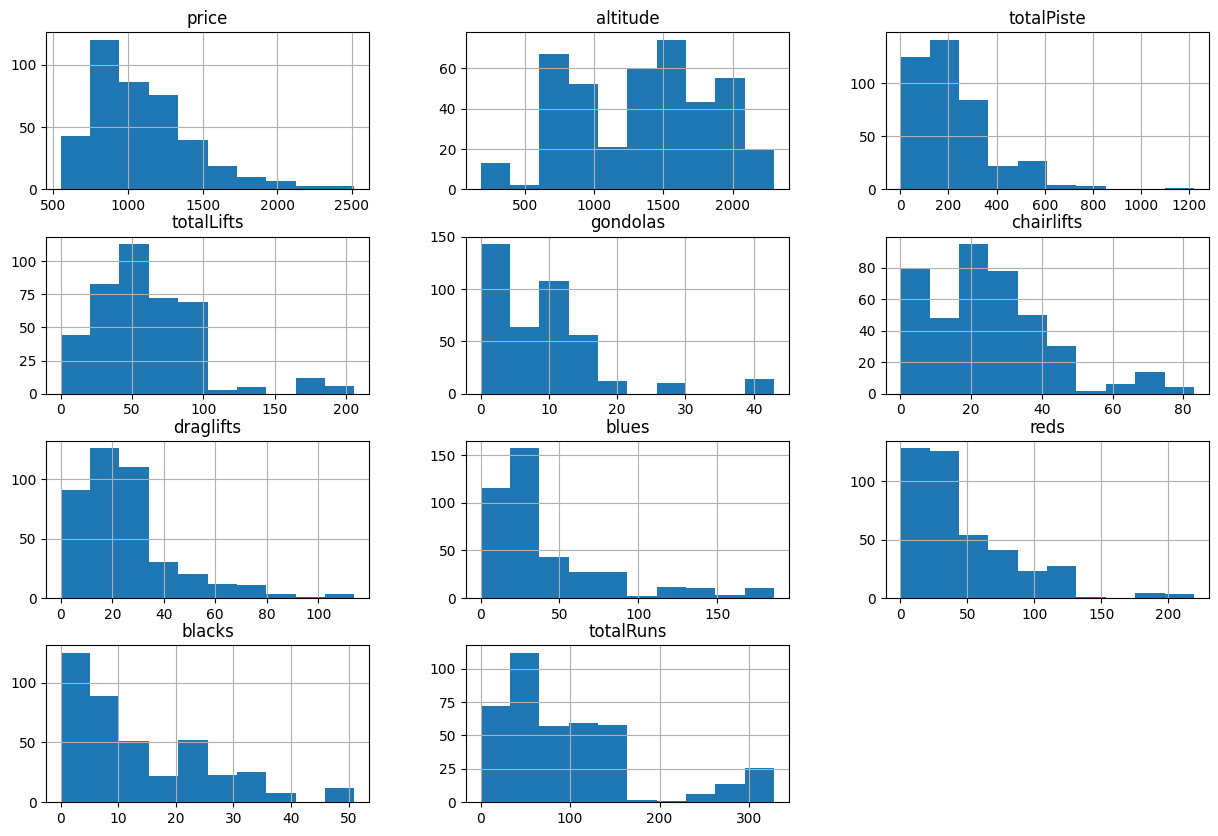

In [19]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()
     

O **Gráfico de Densidade**, ou **Density Plot**, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição dos atributos do dataset.

Veremos que muitos dos atributos têm uma distribuição distorcida. Uma transformação como a **Box-Cox**, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.


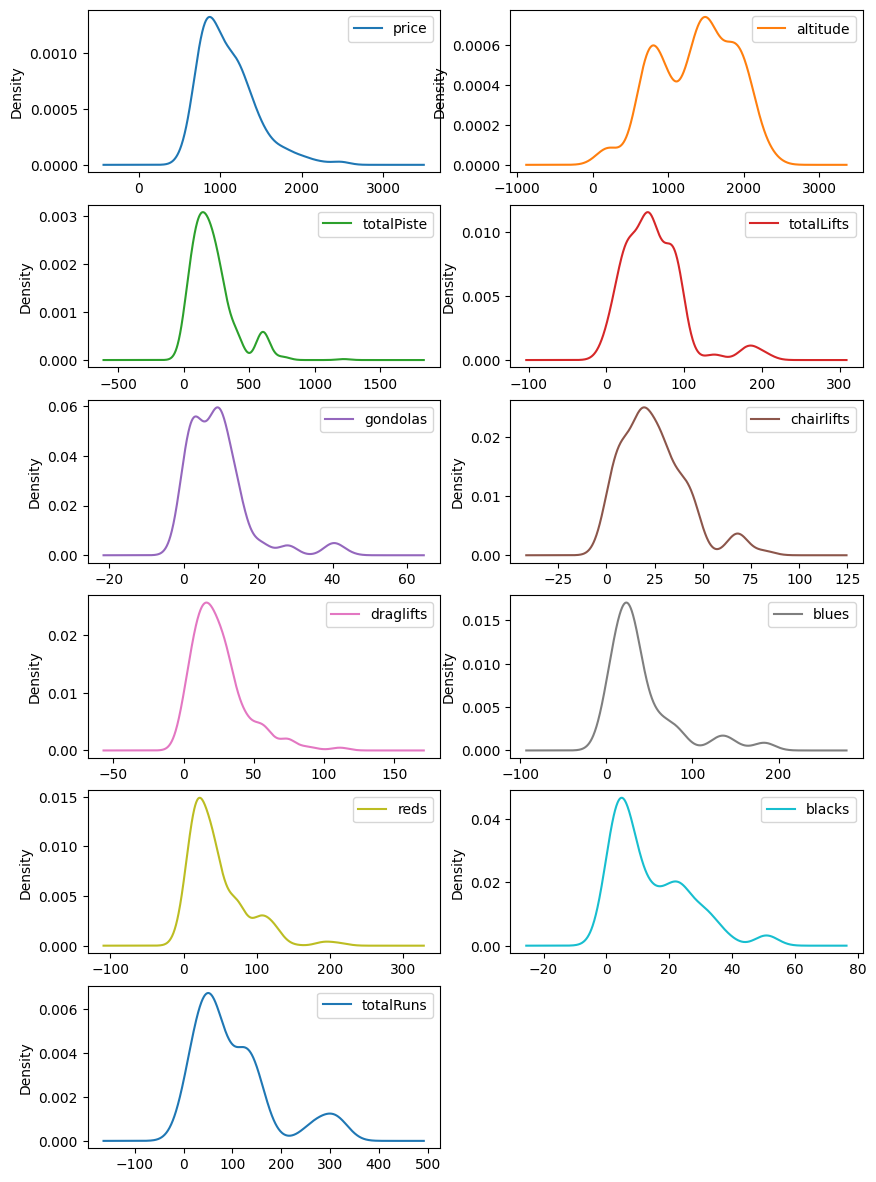

In [20]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (12,2), sharex = False, figsize = (10,30))
plt.show()

Vamos agora trabalhar com **boxplot**s. No boxblot, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.
OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

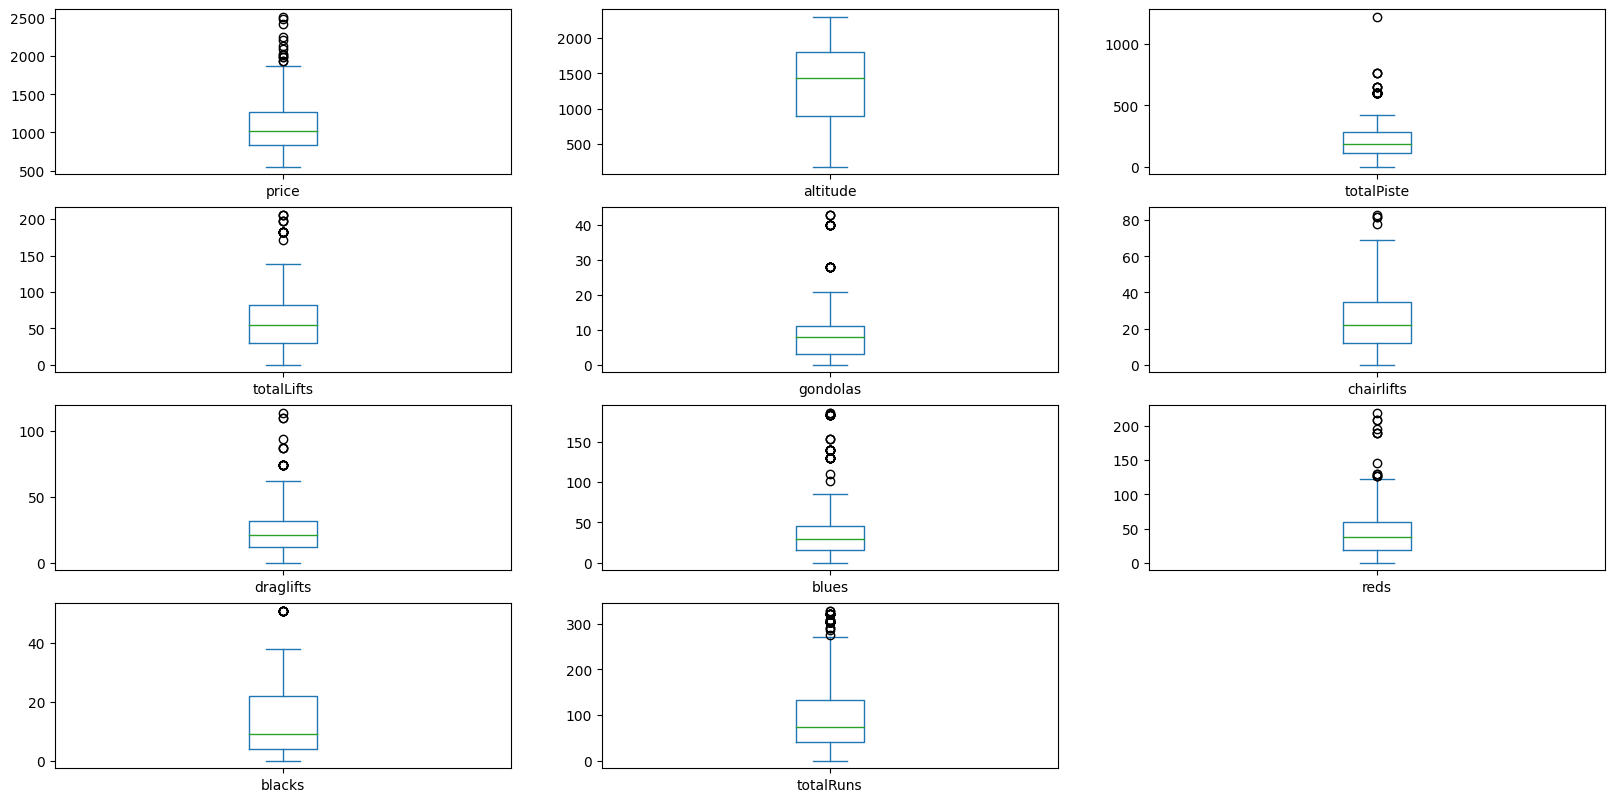

In [21]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (6 ,3), sharex = False, sharey = False, figsize = (20, 15))
plt.show()


Inspecionar recursos categóricos de baixa cardinalidade:

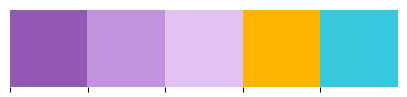

In [22]:
# Color Palette
custom_colors = ['#9357b4', '#c193dd', '#e1c2f2', '#ffb500', '#36c9dd']
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set tick size
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

In [23]:
def barplot_features(df, feature, title, palette = custom_colors[2:]):
    '''Takes the numerical columns and plots the barplot.'''

    # We need to extract both the name of the category and the no. of appearences
    index = df[feature].value_counts().reset_index()["index"].values
    values = df[feature].value_counts().reset_index()[feature].values 

    plt.figure(figsize = (18, 3))
    sns.barplot(x = index, y = values, palette = palette)
    plt.title(title, fontsize=15)
    plt.show();

    del index, values
    gc.collect()

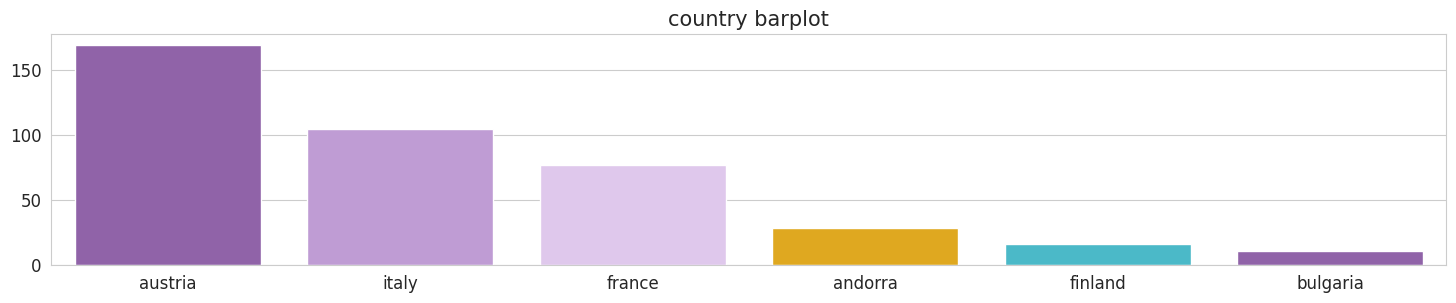

In [24]:
# Inspecionar cardionalidade da coluna country (país)
categorical_for_bar = ['country']
for feature in categorical_for_bar:
      barplot_features(dataset, feature=feature, title = feature + " barplot", palette = custom_colors)

A **Áustria** é o país *mais frequentado* com **169 hotéis de esqui**, e a **Bulgária** é o *menos frequentado* com apenas **11 hotéis**.

### 3.3. Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A covariância representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:

Próximo de -1 : há uma correlação negativa entre as variáveis,
Próximo de +1: há uma correlação positiva entre as variáveis.
0: não há correlação entre as variáveis.
OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A matriz de correlação exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação.

O código a seguir exibe a matriz de correlação.

Por sua vez, o gráfico de dispersão (scatter plot) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

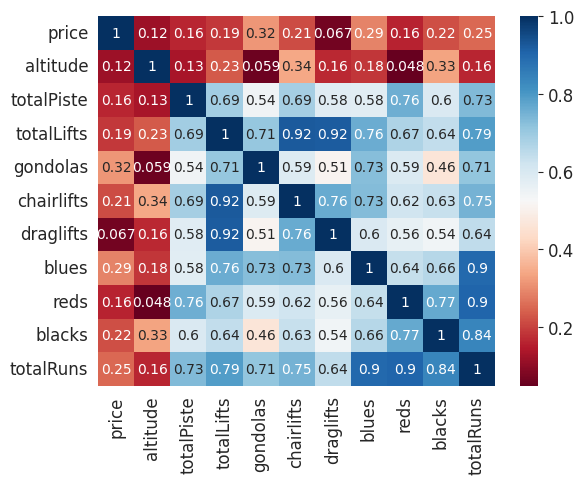

In [25]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

In [26]:
dataset.corr().style.background_gradient(cmap = "Purples")

,price,altitude,totalPiste,totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns
price,1.000000,0.116842,0.160318,0.186678,0.315569,0.214678,0.066747,0.290029,0.159755,0.218314,0.252457
altitude,0.116842,1.000000,0.133424,0.232985,0.058555,0.341147,0.164306,0.182738,0.048489,0.333471,0.163390
totalPiste,0.160318,0.133424,1.000000,0.689280,0.543209,0.686207,0.582958,0.577665,0.755090,0.597221,0.733926
totalLifts,0.186678,0.232985,0.689280,1.000000,0.708933,0.924841,0.921329,0.760188,0.670675,0.642521,0.791513
gondolas,0.315569,0.058555,0.543209,0.708933,1.000000,0.590577,0.509618,0.728045,0.592585,0.462964,0.711888
chairlifts,0.214678,0.341147,0.686207,0.924841,0.590577,1.000000,0.764448,0.729129,0.619891,0.634176,0.750748
draglifts,0.066747,0.164306,0.582958,0.921329,0.509618,0.764448,1.000000,0.596478,0.562016,0.542691,0.643721
blues,0.290029,0.182738,0.577665,0.760188,0.728045,0.729129,0.596478,1.000000,0.636952,0.660272,0.897557
reds,0.159755,0.048489,0.755090,0.670675,0.592585,0.619891,0.562016,0.636952,1.000000,0.766205,0.904543
blacks,0.218314,0.333471,0.597221,0.642521,0.462964,0.634176,0.542691,0.660272,0.766205,1.000000,0.840031


In [ ]:
# Scatter Plot com Seaborn 
sns.pairplot(dataset)

## 4. Pré-processamento de Dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1 Tratamento de Missings e Limpeza

Sabemos que o datset ski_hotels não tem missings aparentes, mas valores "0" que parecem ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

Verificamos através do comando acima que não há valores ausentes (missings) nas colunas do dataset **ski_hotels**.

In [ ]:
# salvando um NOVO dataset para tratamento de missings 

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
atributos = dataset

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [ ]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# exibindo as primeiras linhas
datasetSemMissings.head()
     

### 4.2 Separação em conjunto de treino e conjunto de teste

In [ ]:
# Ordenar o dataframe pela coluna country
dataset.sort_values(by='country')

In [ ]:
# Para alterar a ordenação do dataframe em si, teríamos que fazer:
# dataset = dataset.sort_values(by=' country')

In [ ]:
# use first column as index
dataset = dataset.set_index('country')

In [ ]:
# Ordenar o dataframe pela coluna price (preço em libras esterlinas)
dataset.sort_values(by='price')

In [ ]:
# Ordenando pela coluna price de ordem descendente (os Hotéis de Esqui na Europa serão ordenados descentemente por preço, ou seja, do maior para o menor preço)
dataset.sort_values(by='price', ascending=False)

In [ ]:
# selencionando Hotéis de Esqui na Europa segundo o critério de price (preço) > 1.000 libras esterlinas
dataset[dataset['price']> 1000]


In [ ]:
# Exibindo a média de cada atributo
dataset.groupby('hotel').mean()

In [ ]:
print(dataset)
